<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/map_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map creation with cartopy
- cartopy reference:
- [https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html](https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html)

In [2]:
# Do this if you are using google colab
! pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.1 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.path as mpath
import cartopy.crs as ccrs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## first example : Cylindrical projection
- simply plot the coastline in Plate Carree projection
- cylindrical projection with the standard parallel at Equator

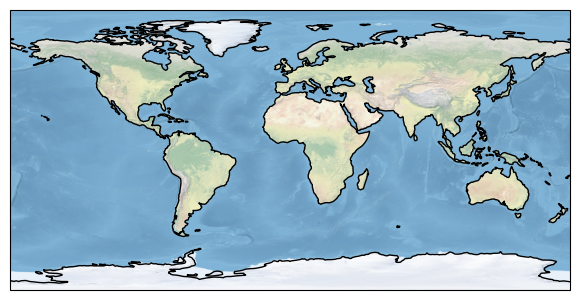

In [6]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plt.show()

- then add surface air temperature for Jan 2024 using pcolor

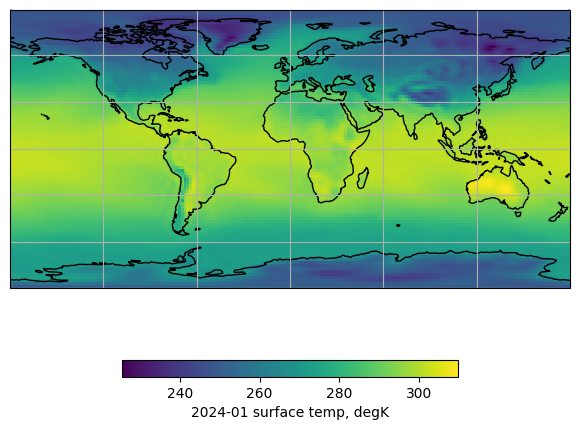

In [11]:
ds=xr.open_dataset('/content/drive/MyDrive/EAS2655_4821/air.2m.mon.mean.nc')
x=ds.lon
y=ds.lat
z=ds.air.sel(time='2024-01',method='nearest')
#
fig=plt.figure(figsize=(7,6))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.PlateCarree())
im=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
plt.colorbar(im,ax=ax,location='bottom',label='2024-01 surface temp, degK',shrink=.6)
plt.show()

## second example: Azimuthal projection
- Azimuthal projection with specific central_longitude and central_latitude
- Stereographic projection

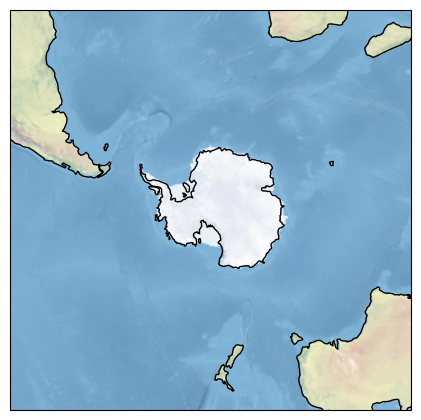

In [13]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=0,central_latitude=-90))
# Limit the map to -30 degrees latitude and below.
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plt.show()

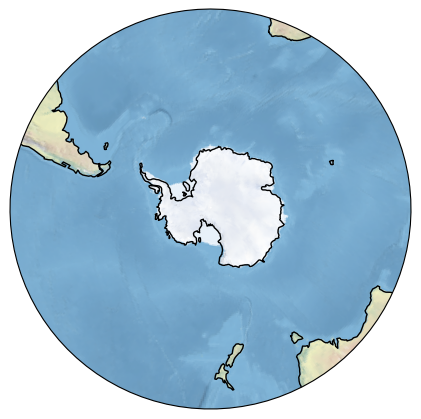

In [14]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=0,central_latitude=-90))
# Limit the map to -30 degrees latitude and below.
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
# set up circular boundary at 30 degree south
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
plt.show()

- then, add atmospheric temperature

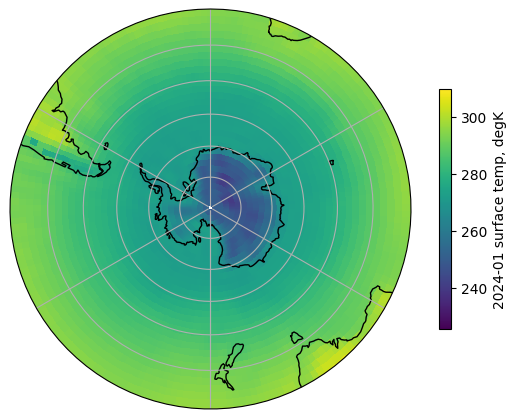

In [15]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=0,central_latitude=-90))
# Limit the map to -30 degrees latitude and below.
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
#
im=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
#
# set up circular boundary at 30 degree south
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
#
plt.colorbar(im,ax=ax,location='right',label='2024-01 surface temp, degK',shrink=.6)
plt.show()

- Do the same for north pole

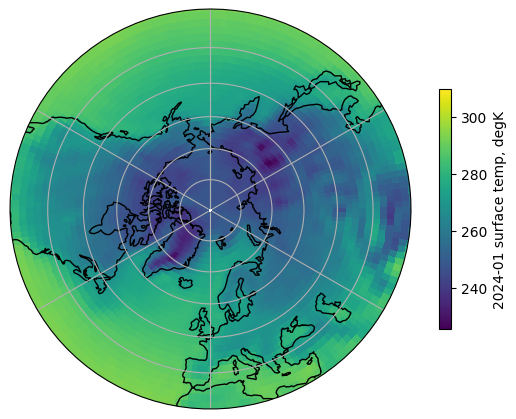

In [16]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=0,central_latitude=90))
# Limit the map to -30 degrees latitude and below.
ax.set_extent([-180, 180, 90, 30], ccrs.PlateCarree())
#
im=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
#
# set up circular boundary at 30 degree south
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
#
plt.colorbar(im,ax=ax,location='right',label='2024-01 surface temp, degK',shrink=.6)
plt.show()

- centered over Atlanta (84W, 33N)

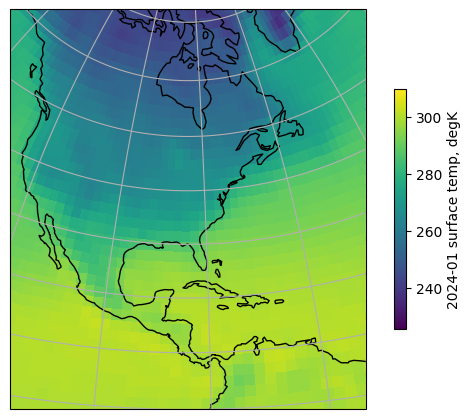

In [17]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=-84,central_latitude=33))
# Limit the map to -30 degrees latitude and below.
ax.set_extent([-84-30, -84+30, 0, 70], ccrs.PlateCarree())
#
im=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
#
plt.colorbar(im,ax=ax,location='right',label='2024-01 surface temp, degK',shrink=.6)
plt.show()

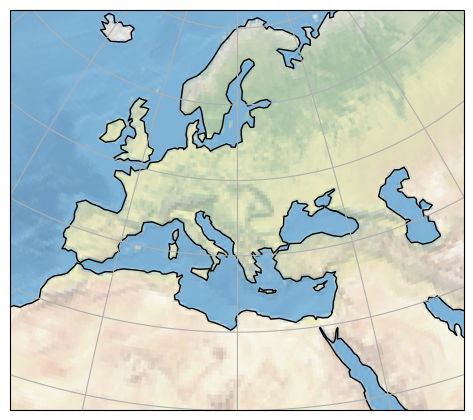

In [19]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Stereographic(central_longitude=20,central_latitude=50))
# Center the map over Europe
ax.set_extent([20-30, 20+30, 20, 70], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.show()

## 3rd example: Conic projection

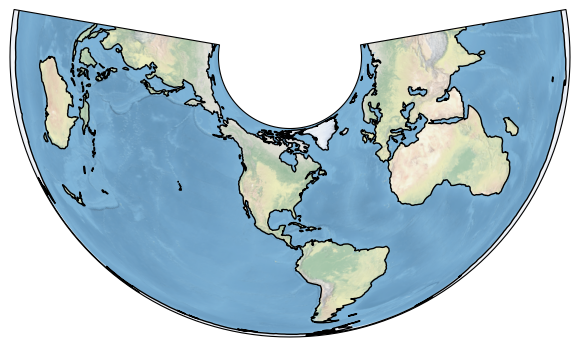

In [20]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.AlbersEqualArea(central_longitude=-84,central_latitude=32))
ax.coastlines()
ax.stock_img()
plt.show()

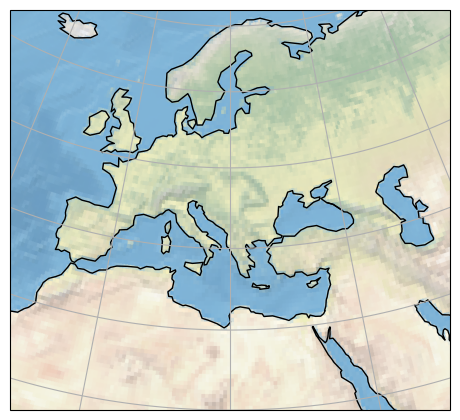

In [22]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.AlbersEqualArea(central_longitude=20,central_latitude=50))
# Center the map over Europe
ax.set_extent([20-30, 20+30, 20, 70], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.show()

## Robinson projection

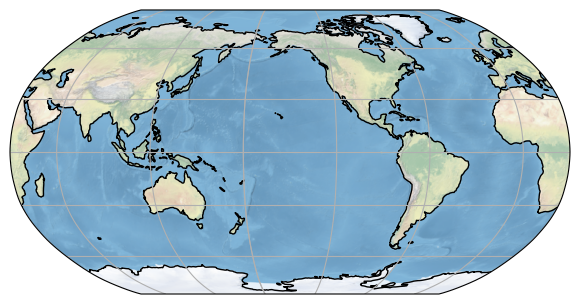

In [28]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.show()

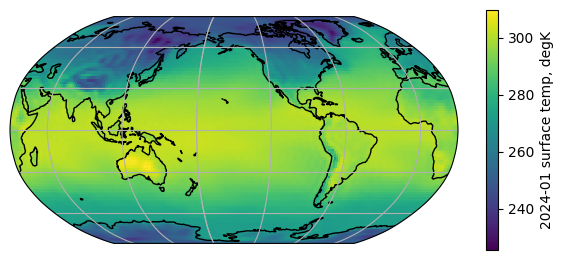

In [29]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Robinson(central_longitude=-150))
ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.colorbar(im,ax=ax,location='right',label='2024-01 surface temp, degK',shrink=.6)
plt.show()

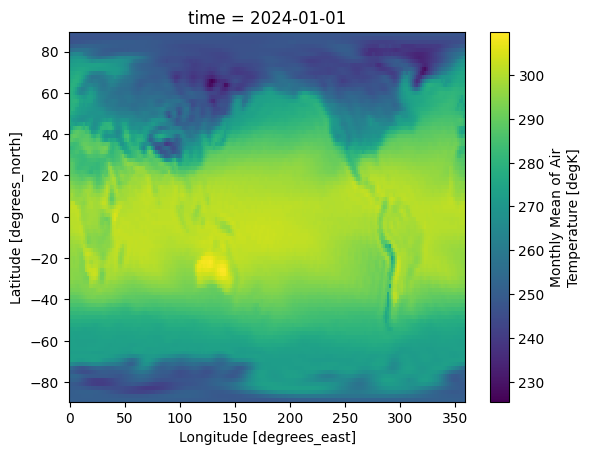

In [30]:
ds.air.sel(time='2024-1',method='nearest').plot()

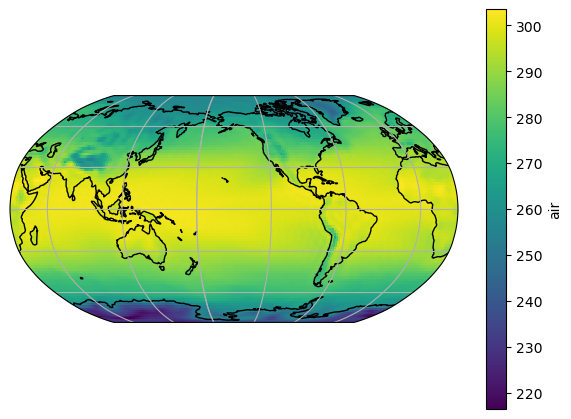

In [ ]:
# it's possible to combine with xarray's .plot method
fig=plt.figure(figsize=(7,5))
ax1 = fig.add_axes([.1,.1,.8,.8],projection=ccrs.Robinson(central_longitude=-150))
ds.air.sel(time=slice('2023-01','2024-01')).mean('time').plot(ax=ax1,transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.stock_img()
ax1.gridlines()
plt.show()